In [1]:
#                         SALARY_PREDICTION PROJECT

In [2]:
import numpy as np
import pandas as pd

#### libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#### import sklearn libraries for training and testing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## importing the data set
salary_org=pd.read_csv('train.csv')
salary_org.head()

salary_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 519.1+ KB


In [4]:
salary_cpy=salary_org.copy()


In [5]:
salary_cpy.columns
salary_cpy.columns.isnull().sum()
salary_cpy.columns=salary_cpy.columns.str.strip()
salary_cpy.columns.str

In [6]:
### checking null values in data set
salary_cpy.isnull().sum()
### dropping null values of a specific columns
salary_cpy=salary_cpy.dropna(subset=['HireDate'])
## checking null values again of dropped
salary_cpy.isnull().sum()
print(salary_cpy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          18911 non-null  object
 1   JobTitle      18911 non-null  object
 2   AgencyID      18911 non-null  object
 3   Agency        18911 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18911 non-null  object
 6   GrossPay      15688 non-null  object
dtypes: object(7)
memory usage: 664.8+ KB
None


In [7]:
### dropping gross pay columns as it is no further use
salary_cpy.drop('GrossPay',axis=1,inplace=True)

In [8]:
## value counts of a particular agency
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02688      1
W02658      1
W02503      1
A99296      1
W02411      1
Name: AgencyID, Length: 1177, dtype: int64

In [9]:
print(salary_cpy.Agency.value_counts())
print(salary_cpy.JobTitle.value_counts())
salary_cpy.HireDate.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
M-R Labor Commissioner         6
Council Services               6
Legislative Reference          5
Special City Services          4
M-R Cable & Comm               4
Name: Agency, Length: 65, dtype: int64
AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
MAILING SUPV                         1
BUILDING MAINT GENERAL SUPV          1
ASST CHIEF DIV OF UTILITY MAIN       1
BUDGET/MANAGEMENT ANALYST IV         1
SUPERVISOR OF ADMINISTRATION C       1
Name: JobTitle, Length: 1073, dtype: int64


05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
04/18/1977       1
10/13/2010       1
12/14/2004       1
08/30/1989       1
03/16/1992       1
Name: HireDate, Length: 4737, dtype: int64

In [10]:
salary_cpy['HireDay']=salary_cpy['HireDate'].apply(lambda x : (int)(str(x[3:5])))
salary_cpy['HireMonth']=salary_cpy['HireDate'].apply(lambda x : (int)(str(x[:2])))
salary_cpy['HireYear']=salary_cpy['HireDate'].apply(lambda x : (int)(str(x[6:])))
salary_cpy['AnnualSalary']=salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x[1:])))

In [11]:
### trimming all the leading and trailing spaces of all catgorical columns
### replacing all double spaces
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x : str(x).strip().replace("  "," "))


In [12]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x : str(x).upper())
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x : str(x).upper())
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x : str(x).upper())

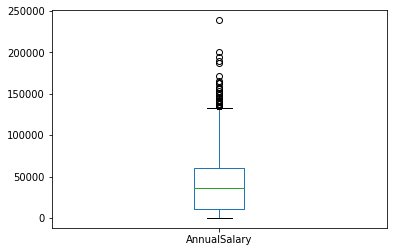

In [13]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

## Exploring the data set

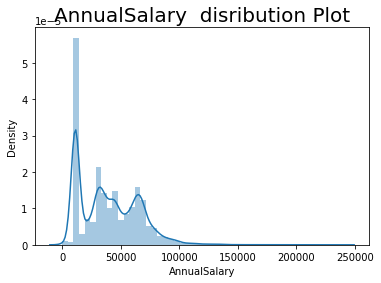

In [14]:
sns.distplot(salary_cpy.AnnualSalary)
plt.title('AnnualSalary  disribution Plot',fontsize=20,)
plt.show()

In [15]:
print(salary_cpy.head(5),salary_cpy.columns)

                 Name                       JobTitle AgencyID  \
0     Aaron,Keontae E                 AIDE BLUE CHIP   W02200   
1    Aaron,Patricia G  FACILITIES/OFFICE SERVICES II   A03031   
2       Aaron,Petra L     ASSISTANT STATE'S ATTORNEY   A29005   
3  Abaineh,Yohannes T                 EPIDEMIOLOGIST   A65026   
4    Abbene,Anthony M         POLICE OFFICER TRAINEE   A99416   

                    Agency    HireDate  AnnualSalary  HireDay  HireMonth  \
0             YOUTH SUMMER  06/10/2013       11310.0       10          6   
1       OED-EMPLOYMENT DEV  10/24/1979       53428.0       24         10   
2  STATES ATTORNEYS OFFICE  09/25/2006       68300.0       25          9   
3   HLTH-HEALTH DEPARTMENT  07/23/2009       62000.0       23          7   
4        POLICE DEPARTMENT  07/24/2013       43999.0       24          7   

   HireYear  
0      2013  
1      1979  
2      2006  
3      2009  
4      2013   Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'Annual

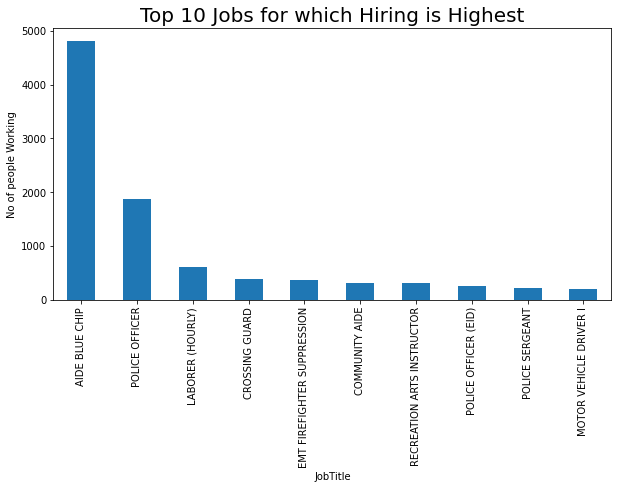

In [16]:
#Top 10 Jobs that based on hirings
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people Working')
plt.title("Top 10 Jobs for which Hiring is Highest",fontsize=20)
plt.show()

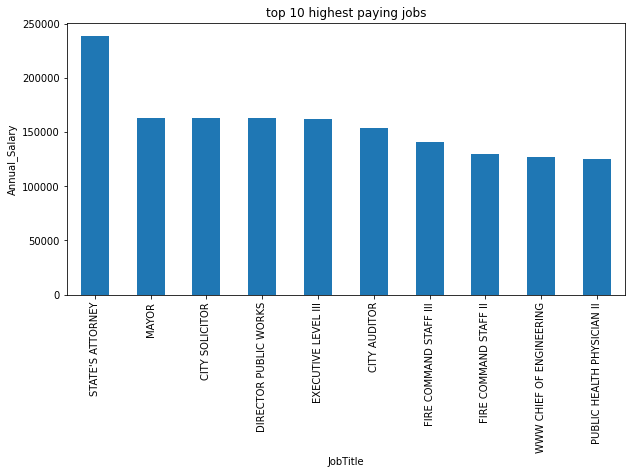

In [17]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.title("top 10 highest paying jobs",fontsize=12)
plt.ylabel("Annual_Salary")
plt.show()

In [18]:
#calculating mean salary
mean_sal=salary_cpy['AnnualSalary'].mean()

good_pay_jobs=salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_pay_jobs[good_pay_jobs.AnnualSalary>mean_sal]['JobTitle']


0                 911 LEAD OPERATOR
1                      911 OPERATOR
2           911 OPERATOR SUPERVISOR
3                 ACCOUNT EXECUTIVE
4                      ACCOUNTANT I
                   ...             
1055           ZONING ADMINISTRATOR
1056    ZONING APPEALS ADVISOR BMZA
1057     ZONING ENFORCEMENT OFFICER
1058              ZONING EXAMINER I
1059             ZONING EXAMINER II
Name: JobTitle, Length: 802, dtype: object

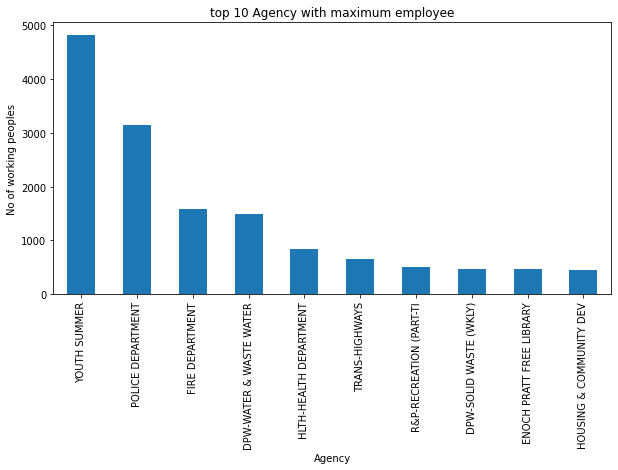

In [19]:
#plotting top 10 agencies with maximum no of employee
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.title("top 10 Agency with maximum employee",fontsize=12)
plt.ylabel("No of working peoples")
plt.show()

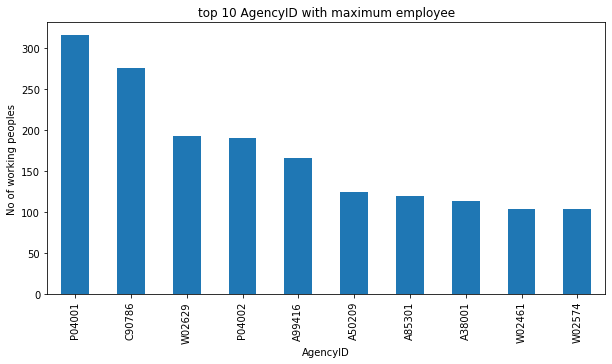

In [20]:
#top 10 agency id having maximum employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.title("top 10 AgencyID with maximum employee",fontsize=12)
plt.ylabel("No of working peoples")
plt.show()

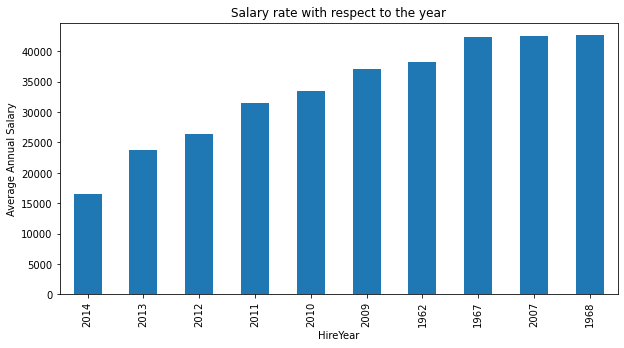

In [21]:
# creating a plot between salary vs HireYear
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values(ascending=True).head(10).plot.bar()
plt.title("Salary rate with respect to the year",fontsize=12)
plt.ylabel("Average Annual Salary")
plt.show()

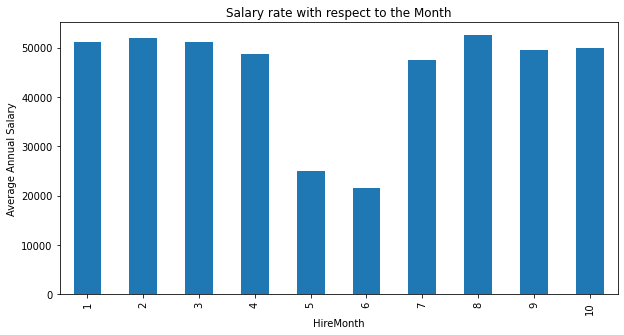

In [22]:
# creating a plot between salary vs HireMonth
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().head(10).plot.bar()
plt.title("Salary rate with respect to the Month",fontsize=12)
plt.ylabel("Average Annual Salary")
plt.show()

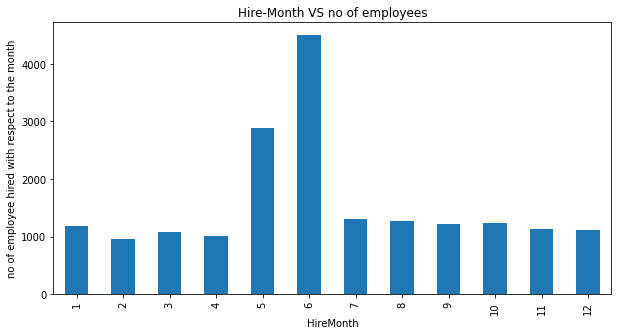

In [23]:
#no of employee hired on a month
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel("no of employee hired with respect to the month")
plt.title("Hire-Month VS no of employees")
plt.show()

<Figure size 1440x1440 with 0 Axes>

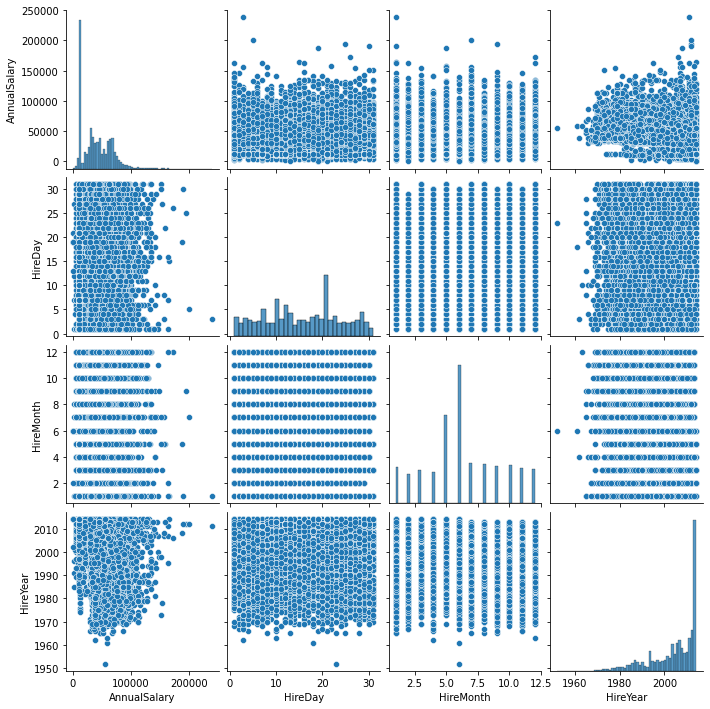

In [24]:
# checking if thre any relation between varibles
# thus plotting a pair plot
plt.figure(figsize=(20,20))
sns.pairplot(salary_cpy)
plt.show()

<AxesSubplot:>

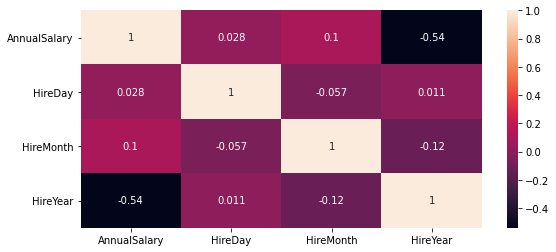

In [25]:
# plotting a heat map to find the correlation between columns 
plt.figure(figsize=(9,4))
sns.heatmap(salary_cpy.corr(),annot=True)

## Feature Engineering

In [26]:
#creating copy of old dataframe 
salary_master=salary_cpy.copy()

In [27]:
#applying mean encoding for jobtitle
mean_job=salary_master.groupby(['JobTitle'])['AnnualSalary'].mean()
print(mean_job)
salary_master['JobTitle']=salary_master['JobTitle'].map(mean_job)
print(salary_master['JobTitle'])

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1060, dtype: float64
0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18911, dtype: float64


In [28]:
#applying mean encoding for Agency
mean_job=salary_master.groupby(['Agency'])['AnnualSalary'].mean()
salary_master['Agency']=salary_master['Agency'].map(mean_job)
print(salary_master['Agency'])

0        11313.967200
1        51495.424242
2        65360.307263
3        39980.900360
4        61579.081503
             ...     
18976    11313.967200
18977    11313.967200
18978    61579.081503
18979    61579.081503
18980    42565.513078
Name: Agency, Length: 18911, dtype: float64


In [29]:
#applying mean encoding for Agency ID
mean_job=salary_master.groupby(['AgencyID'])['AnnualSalary'].mean()
salary_master['AgencyID']=salary_master['AgencyID'].map(mean_job)
print(salary_master['AgencyID'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18911, dtype: float64


In [30]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  float64
 2   AgencyID      18911 non-null  float64
 3   Agency        18911 non-null  float64
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireDay       18911 non-null  int64  
 7   HireMonth     18911 non-null  int64  
 8   HireYear      18911 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.3+ MB


In [31]:
## droping name coloumn as annual salary doesnt depend on Name
## dropping HireDate as we have other attribute as hireday, month, year
salary_master=salary_master.drop(['Name','HireDate'],axis=1)
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18911 non-null  float64
 1   AgencyID      18911 non-null  float64
 2   Agency        18911 non-null  float64
 3   AnnualSalary  18911 non-null  float64
 4   HireDay       18911 non-null  int64  
 5   HireMonth     18911 non-null  int64  
 6   HireYear      18911 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


<Figure size 1080x1080 with 0 Axes>

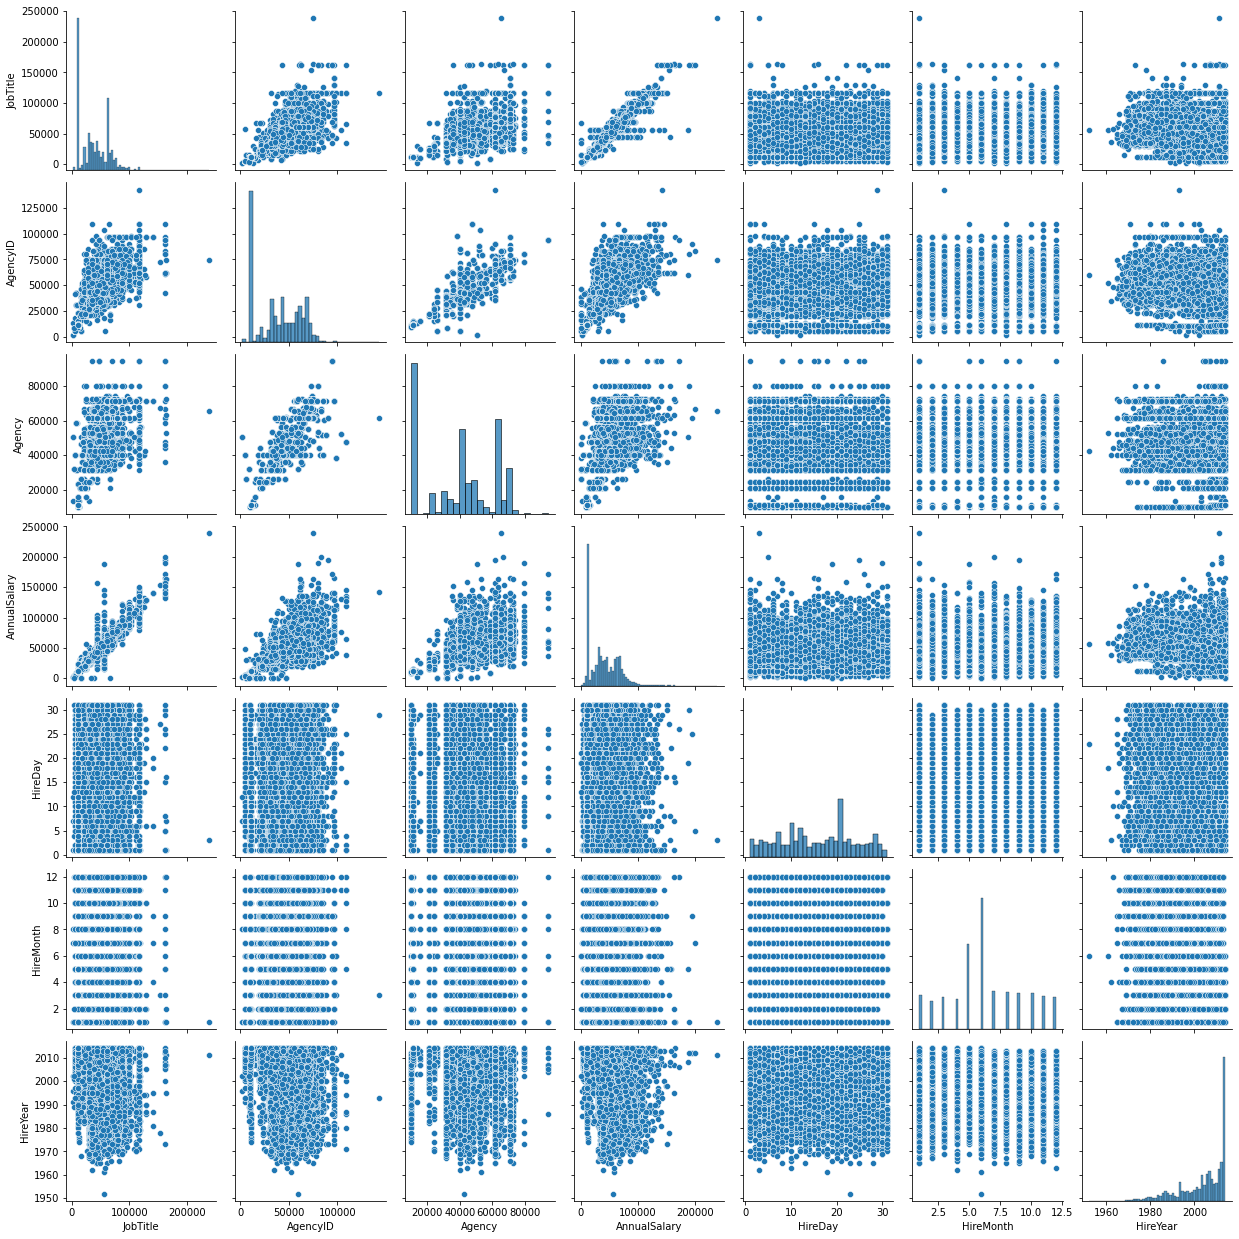

In [32]:
#plotting a pair plot
plt.figure(figsize=(15,15))
sns.pairplot(salary_master)
plt.show()

<AxesSubplot:>

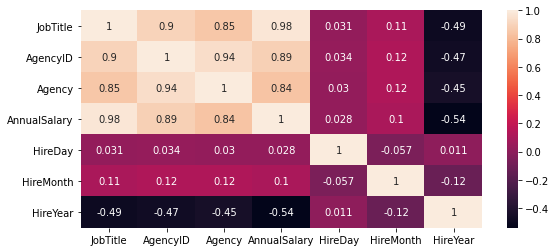

In [33]:
# plotting a heat map to find the correlation between columns 
plt.figure(figsize=(9,4))
sns.heatmap(salary_master.corr(),annot=True)

# Train Test Split

In [34]:
salary_train,salary_test=train_test_split(salary_master,train_size=0.7,random_state=42)
#seperating dependent and independent variable in train set
y_train=salary_train.pop('AnnualSalary')
x_train=salary_train
#seperating dependent and independent variable in train set
y_test=salary_test.pop('AnnualSalary')
x_test=salary_test
x_train.describe()


,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,13237.000000,13237.000000,13237.000000,13237.000000,13237.000000,13237.000000
mean,39649.313419,39622.679079,39649.158459,15.734608,6.349853,2004.093299
std,24536.374380,22333.267027,21062.048941,8.388022,2.959340,10.404234
min,2000.000000,2000.000000,10234.535294,1.000000,1.000000,1952.000000
25%,11313.967200,11310.000000,11313.967200,9.000000,5.000000,1998.000000
50%,36044.000000,41493.263158,42565.513078,16.000000,6.000000,2007.000000
75%,60588.139335,59881.547170,61579.081503,22.000000,8.000000,2013.000000
max,238772.000000,109113.571429,94265.727273,31.000000,12.000000,2014.000000


# Scaling

In [35]:
# scale the train
scaler = StandardScaler()

x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])

x_train.describe()


#Scale the test
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns])

x_test.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,5.674000e+03,5.674000e+03,5.674000e+03,5.674000e+03,5.674000e+03,5.674000e+03
mean,1.189664e-16,9.141632e-17,-1.308631e-16,-1.177142e-16,-6.261392e-18,-4.622159e-15
std,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00
min,-1.522829e+00,-1.675415e+00,-1.389795e+00,-1.768792e+00,-1.849913e+00,-3.765817e+00
25%,-1.146470e+00,-1.262203e+00,-1.338858e+00,-8.151388e-01,-4.827928e-01,-5.828948e-01
50%,-1.480833e-01,8.197679e-02,1.358461e-01,1.930752e-02,-1.410128e-01,2.851748e-01
75%,8.445997e-01,8.951158e-01,1.033062e+00,7.345472e-01,8.843270e-01,8.638878e-01
max,4.990938e+00,4.569363e+00,2.575487e+00,1.807407e+00,1.909667e+00,9.603400e-01


# Creating Model For Predicting The Salary

In [36]:
#linear regression
lr=LinearRegression()
salary_reg=lr.fit(x_train,y_train)

# calculating R square score
salary_reg.score(x_train,y_train)

0.9593139511814608

# Testing model

In [37]:
salary_reg.score(x_test,y_test)

0.9684019983589212

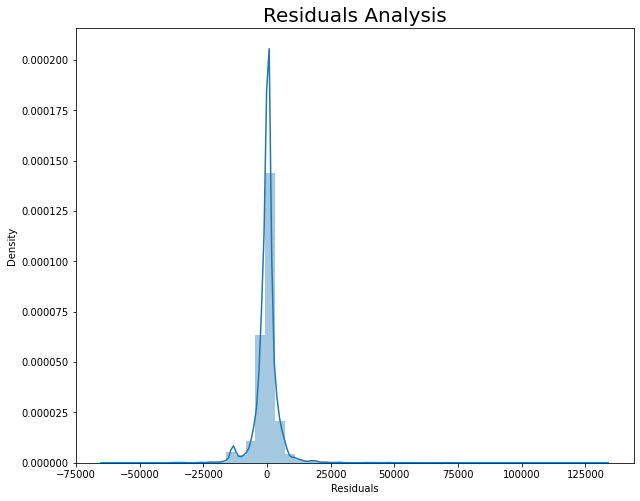

In [38]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,8))
y_train_predict=salary_reg.predict(x_train)
res=y_train - y_train_predict
sns.distplot(res)
plt.xlabel("Residuals")
plt.title("Residuals Analysis",Fontsize=20)
plt.show()

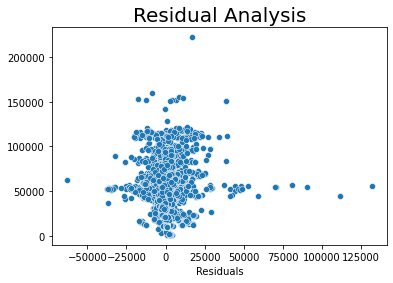

In [39]:
sns.scatterplot(x=res,y=y_train_predict)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

In [40]:
# Print coef
print("Coef are:",salary_reg.coef_)

#print intercept
print("Intercept is",salary_reg.intercept_)

# Let us create a model equation and store it in a string

model = str(salary_reg.intercept_)

for i in range(len(salary_reg.coef_)):
    model = model +' + '  +(str(salary_reg.coef_[i])) + ' * ' +(str(x_train.columns[i]))
print(model)

Coef are: [ 2.22897321e+04  2.99550248e+03 -1.71943115e+03 -1.48672359e+01
 -1.12604804e+02 -2.09928107e+03]
Intercept is 39663.08901034979
39663.08901034979 + 22289.732128802618 * JobTitle + 2995.502483686525 * AgencyID + -1719.43115170359 * Agency + -14.8672358629384 * HireDay + -112.60480447549222 * HireMonth + -2099.281067953078 * HireYear
